<a href="https://colab.research.google.com/github/c-c-c-c/yolo_sample/blob/master/yolo_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLOv2 × Tensor Flow


In [1]:
## darkflowを落とす
%cd /content/
!git clone https://github.com/thtrieu/darkflow.git
%mkdir /content/darkflow/bin
%cd /content/darkflow/bin


/content
Cloning into 'darkflow'...
remote: Enumerating objects: 2713, done.
remote: Total 2713 (delta 0), reused 0 (delta 0), pack-reused 2713
Receiving objects: 100% (2713/2713), 32.98 MiB | 25.72 MiB/s, done.
Resolving deltas: 100% (1762/1762), done.
/content/darkflow/bin


In [2]:
# 学習済みのYOLOの重みを落とす
!wget https://pjreddie.com/media/files/yolov2.weights

--2020-06-29 13:00:43--  https://pjreddie.com/media/files/yolov2.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203934260 (194M) [application/octet-stream]
Saving to: ‘yolov2.weights’

yolov2.weights      100%[===================>] 194.49M   169KB/s    in 21m 25s 

2020-06-29 13:22:09 (155 KB/s) - ‘yolov2.weights’ saved [203934260/203934260]



In [3]:
%ls ../
%pwd

bin/  darkflow/  flow*       LICENSE      README.md    setup.py
cfg/  demo.gif   labels.txt  preview.png  sample_img/  test/


'/content/darkflow/bin'

In [4]:
# darkflow のインストール
%cd /content/darkflow/
!python setup.py build_ext --inplace

/content/darkflow
Compiling darkflow/cython_utils/nms.pyx because it changed.
Compiling darkflow/cython_utils/cy_yolo2_findboxes.pyx because it changed.
Compiling darkflow/cython_utils/cy_yolo_findboxes.pyx because it changed.
[1/3] Cythonizing darkflow/cython_utils/cy_yolo2_findboxes.pyx
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/darkflow/darkflow/cython_utils/cy_yolo2_findboxes.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
[2/3] Cythonizing darkflow/cython_utils/cy_yolo_findboxes.pyx
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/darkflow/darkflow/cython_utils/cy_yolo_findboxes.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
[3/3] Cythonizing darkflow/cython_u

In [5]:
# tensorflowのバージョンを合わせる
!pip uninstall -y tensorflow
!pip install tensorflow-gpu==1.15


Uninstalling tensorflow-2.2.0:
  Successfully uninstalled tensorflow-2.2.0
     |████████████████████████████████| 411.5MB 36kB/s 
     |████████████████████████████████| 512kB 43.9MB/s 
     |████████████████████████████████| 3.8MB 46.8MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=6f7b02755c79f699468096e63717d0bb457d2cdf1dafde63f7b446bc8bceb42b
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
     

### 環境構築終了、YOLO実行本体

In [15]:
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow
import cv2
import random

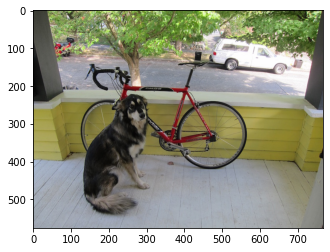

In [16]:
# 元の画像
imgcv_origin = cv2.imread("sample_img/sample_dog.jpg")
imgcv = imgcv_origin.copy()
imgcv4show = cv2.cvtColor( imgcv, cv2.COLOR_BGR2RGB)
plt.imshow(imgcv4show)

In [17]:
from darkflow.net.build import TFNet

options = {"model": "cfg/yolo.cfg", "load": "bin/yolov2.weights", "threshold": 0.1}
 
tfnet = TFNet(options)
result = tfnet.return_predict(imgcv)
print(result)


/content/darkflow/darkflow/dark/darknet.py:54: UserWarning: ./cfg/yolov2.cfg not found, use cfg/yolo.cfg instead
  cfg_path, FLAGS.model))


Parsing cfg/yolo.cfg
Loading bin/yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.0188748836517334s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bno

In [18]:

# 画像に結果を描画
def write(x, img):

    # cls = int(x[-1])
    label = x["label"]
    conf = x["confidence"]
    if conf > 0.6:
        cv2.rectangle(img, (x["topleft"]["x"], x["topleft"]["y"] ), (x["bottomright"]["x"], x["bottomright"]["y"]) , (255, 0, 0), 1)
        text = label + " " + ('%.2f' % conf)
        cv2.rectangle(img, (x["topleft"]["x"], x["topleft"]["y"] - 15), (x["topleft"]["x"] + 100, x["topleft"]["y"] + 5), (255,0,0), -1)
        cv2.putText(img, text, (x["topleft"]["x"], x["topleft"]["y"]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1) 


In [19]:
# for ループの代わり (TODO)みづらいので、素直にforにする
list(map(lambda x: write(x, imgcv), result))

[None, None, None, None, None]

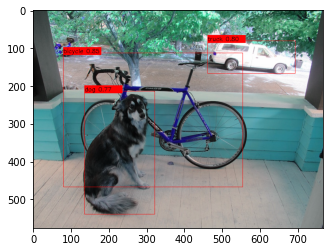

In [20]:
# TODO 枠の色を変える
imgcv_origin4show = cv2.cvtColor( imgcv, cv2.COLOR_BGR2RGB)
plt.imshow(imgcv)